<a href="https://colab.research.google.com/github/ShauryaB24/Machine-Learning/blob/main/Ridge_and_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Data Collection.
    o	Collect the dataset or Create the dataset
•	Data Preprocessing.
    o	Import the Libraries.
    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o-	Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test.
•	Model Building
    o	Import the model building Libraries
    o	Initializing the model
    o	Training and testing the model
    o	Evaluation of Model
    o	Save the Model
•	Application Building
    o	Create an HTML file
    o	Build a Python Code

# Data Preprocessing.
    o	Import the Libraries.
    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o-	Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test.

### 1.Import the Libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2.Importing the dataset.

In [ ]:
df=pd.read_csv("50_Startups.csv")

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [ ]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241379,0.725978,0.964770
Administration,0.241379,1.000000,-0.024699,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.748957
Profit,0.964770,0.198849,0.748957,1.000000


In [ ]:
df.corr().Profit.sort_values(ascending=False)

Profit             1.000000
R&D Spend          0.964770
Marketing Spend    0.748957
Administration     0.198849
Name: Profit, dtype: float64

### 3.Checking for Null Values.

In [ ]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df.State.nunique()

3

In [ ]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
df.State.value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

### 4.Data Visualization.

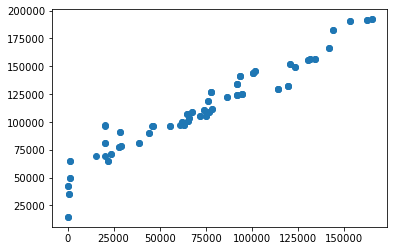

In [ ]:
plt.scatter(df["R&D Spend"],df["Profit"])

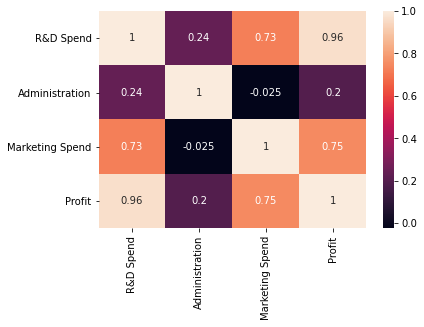

In [ ]:
sns.heatmap(df.corr(),annot=True)

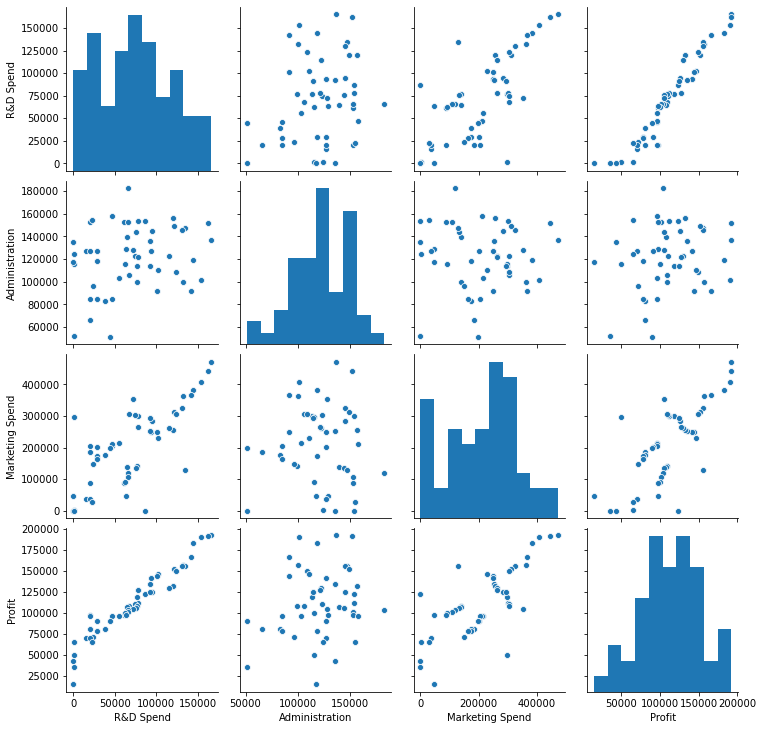

In [ ]:
sns.pairplot(df)

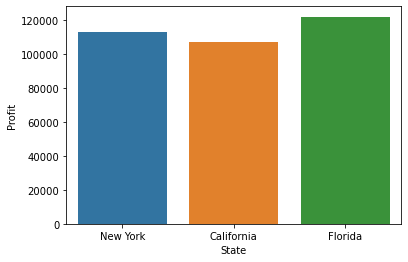

In [ ]:
sns.barplot(x=df["State"],y=df["Profit"],ci=0)

### 5.Outlier Detection

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


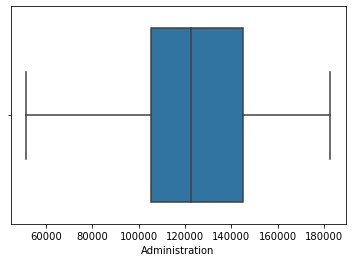

In [ ]:
sns.boxplot(df["Administration"])

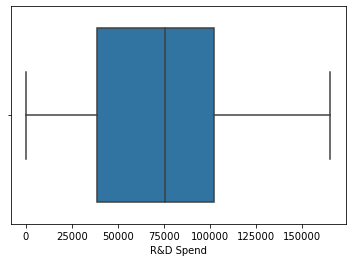

In [ ]:
sns.boxplot(df["R&D Spend"])

### 6.Splitting Dependent and independent Variables

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#indenpendent variables hould be 2 d array or dataframe
X=df.drop(columns=["Profit"],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [ ]:
X.shape

(108, 4)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
y=df["Profit"]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

### 7.Encoding

In [ ]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
X["State"]=le.fit_transform(X["State"])

In [ ]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [ ]:
print(le.classes_)

['California' 'Florida' 'New York']


In [ ]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'California': 0, 'Florida': 1, 'New York': 2}

### 8.Feature Scaling

In [ ]:
standardiation standard scaler   mean=0 and sd=1
min max scaler  0 to 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [ ]:
X_Scaled=ms.fit_transform(X)

In [ ]:
X_Scaled=pd.DataFrame(ms.fit_transform(X),columns=X.columns)

In [ ]:
X_Scaled.head()

,R&D Spend,Administration,Marketing Spend,State
0,1.000000,0.651744,1.000000,1.0
1,0.983359,0.761972,0.940893,0.0
2,0.927985,0.379579,0.864664,0.5
3,0.873136,0.512998,0.812235,1.0
4,0.859438,0.305328,0.776136,0.5


### 9.Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,y,test_size =0.2,random_state =0)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(86, 4) (22, 4) (86,) (22,)


# •	Model Building
    o	Import the model building Libraries
    o	Initializing the model
    o	Training and testing the model
    o	Evaluation of Model
    o	Save the Model

### 1.Import the model building Libraries

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

### 2 Initializing the model

### 3.Train the model

In [ ]:
ridge_regressor=Ridge()

In [ ]:
#alpha should never be zero
parametres={"alpha":[1,2,3,5,10,20,30,40,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parametres,scoring="neg_mean_squared_error",cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 5, 10, 20, 30, 40, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridgecv.best_params_)

{'alpha': 1}


In [ ]:
print(ridgecv.best_score_)

-150424168.22141442


### 4.Test the model

In [ ]:
y_pred=ridgecv.predict(x_test)

In [ ]:
y_pred

array([ 54556.32416702, 130017.92166782,  84687.15947095, 173295.2223158 ,
       108917.94957822, 128735.89224253, 128736.35934265, 155951.19177423,
       117814.48562718,  52712.59507338, 102790.3781561 , 119096.2726001 ,
        54556.32416702, 124206.72612243,  88379.01243395, 126261.35613731,
       126261.35613731,  98802.1865801 ,  74278.88209886, 141546.67661999,
       145564.21281487, 150251.73759042])

In [ ]:
y_test

84      64926.08
10     146121.95
75      90708.19
2      191050.39
24     108552.04
100    144259.40
107    124266.90
7      155752.60
16     126992.93
86      42559.73
68     101004.64
22     110352.25
45      64926.08
60     111313.02
76      89949.14
52     134307.35
13     134307.35
73      96712.80
85      49490.75
54     129917.04
103    132602.65
8      152211.77
Name: Profit, dtype: float64

In [ ]:
profit=pd.DataFrame({"Actual_profit":y_test,"Predicted _profit":y_pred})

In [ ]:
profit

,Actual_profit,Predicted _profit
84,64926.08,54556.324167
10,146121.95,130017.921668
75,90708.19,84687.159471
2,191050.39,173295.222316
24,108552.04,108917.949578
100,144259.40,128735.892243
107,124266.90,128736.359343
7,155752.60,155951.191774
16,126992.93,117814.485627
86,42559.73,52712.595073


### Random value prediction

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
ridgecv.predict([[165349.20,136897.80,471784.10,2]])

array([3.33593348e+10])

In [ ]:
ridgecv.predict(ms.transform([[165349.20,136897.80,471784.10,2]]))

array([188005.75965694])

In [ ]:
fit -- train your model,your data is not changed here
fit_transform  ---after fitting the data is transformed
transform--

### 5.Evaluation of the model

In [ ]:
from sklearn import metrics

In [ ]:
# R- Square
# evaluating testing accuracy
print(metrics.r2_score(y_test,y_pred))

0.9095565216441845


In [ ]:
#training accuracy
print(metrics.r2_score(y_train,ridgecv.predict(x_train)))

0.920686926857262


In [ ]:
#mean squared error
print(metrics.mean_squared_error(y_test,y_pred))

117186385.76630391


In [ ]:
# RMSE (Root Mean Square Error)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

10825.2660829332


In [ ]:
#mean absolute error
print(metrics.mean_absolute_error(y_test,y_pred))

8864.674945619774


### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()

In [ ]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 90}
-110721757.00142069


In [ ]:
y_pred_lasso=lassocv.predict(x_test)
y_pred

array([ 54556.32416702, 130017.92166782,  84687.15947095, 173295.2223158 ,
       108917.94957822, 128735.89224253, 128736.35934265, 155951.19177423,
       117814.48562718,  52712.59507338, 102790.3781561 , 119096.2726001 ,
        54556.32416702, 124206.72612243,  88379.01243395, 126261.35613731,
       126261.35613731,  98802.1865801 ,  74278.88209886, 141546.67661999,
       145564.21281487, 150251.73759042])

In [ ]:
y_test

84      64926.08
10     146121.95
75      90708.19
2      191050.39
24     108552.04
100    144259.40
107    124266.90
7      155752.60
16     126992.93
86      42559.73
68     101004.64
22     110352.25
45      64926.08
60     111313.02
76      89949.14
52     134307.35
13     134307.35
73      96712.80
85      49490.75
54     129917.04
103    132602.65
8      152211.77
Name: Profit, dtype: float64

In [ ]:
y_predict_1= lassocv.predict(x_train)
y_predict_1

array([110645.25812395, 170402.16672734,  98130.0033424 , 173127.39239922,
       116202.85663372,  48506.93685478,  98833.03025482, 155885.15544698,
        83270.67474849, 192447.05055904, 188588.02346007, 162754.1726963 ,
       129029.14336023, 116744.77822639, 116202.85663372, 128972.14601402,
       115538.62217019, 129029.14336023, 112577.52383678,  97972.07217071,
        61320.41337931, 188588.02346007,  75613.12098147,  70791.63185597,
        75033.45096311, 170402.16672734, 145798.57313566, 131166.19230638,
        75613.12098147,  70213.93826635, 162754.1726963 , 149426.94014553,
       134528.92180333, 131166.19230638, 192447.05055904,  90606.80457148,
       102915.55245992, 116903.73177275, 133912.04914422, 133912.04914422,
       110593.03135973,  90858.91569145, 110593.03135973,  98445.35713754,
       152196.76394968, 128972.14601402,  64972.81849658, 173127.39239922,
        97972.07217071, 180627.51083536, 149426.94014553,  70922.84983046,
       114906.01902904, 1

In [ ]:
profit =pd.DataFrame({'Actual_profit':y_test,'Predicted_profit':y_pred_lasso})
profit

,Actual_profit,Predicted_profit
84,64926.08,48927.837919
10,146121.95,134528.921803
75,90708.19,76912.546205
2,191050.39,180627.510835
24,108552.04,112577.523837
100,144259.40,133912.049144
107,124266.90,128972.146014
7,155752.60,159791.131496
16,126992.93,116903.731773
86,42559.73,47332.312472


In [ ]:
lassocv.predict(ms.transform([[165349.20,136897.80,471784.10,2]]))

array([192447.05055904])

In [ ]:
from sklearn import metrics
# R- Square
# evaluating testing accuracy
print(metrics.r2_score(y_test,y_pred_lasso))

# evaluating training accuracy
print(metrics.r2_score(y_train,y_predict_1))

# MSE (Mean square Error)
print(metrics.mean_squared_error(y_test,y_pred_lasso))

print(metrics.mean_absolute_error(y_test,y_pred_lasso))

0.9270137000817488
0.9375436530639505
94567356.91021095
8353.135242526698
